In [1]:
import uproot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ROOT
import seaborn as sns
import pickle
%matplotlib inline
%jsroot on

Welcome to JupyROOT 6.22/01


In [2]:
#pion_data = pd.read_pickle("combined_data_pion_shuffled_02.pkl")
#pion_data

In [3]:
#positron_data = pd.read_pickle("combined_data_positron_shuffled_02.pkl")
#positron_data

In [4]:
req_features = ["NRechits", "rechit_energy_Ecal", "rechit_energy_Hcal", "rechit_energy_Hcal_by_Ecal", "std_x", "std_y", "beamEnergy", "particle" ]

In [5]:
#features = pd.concat([pion_data[req_features], positron_data[req_features]])
#features = features.sample(frac=1)
#features

In [7]:
data = pd.read_pickle("new_combined_data_for_DT.pkl")
data

FileNotFoundError: [Errno 2] No such file or directory: 'new_combined_data_for_DT.pkl'

In [7]:
features.loc[features.rechit_energy_Hcal_by_Ecal>1000000]

,NRechits,rechit_energy_Ecal,rechit_energy_Hcal,rechit_energy_Hcal_by_Ecal,std_x,std_y,beamEnergy,particle
entry,,,,,,,,
91831,96,0.0,380.550070,inf,3.435644,2.929293,20.0,positron
14345,89,0.0,377.767887,inf,4.852741,11.782488,20.0,positron
40647,90,0.0,387.099922,inf,2.991496,3.361349,20.0,positron
78595,87,0.0,465.872040,inf,2.832834,3.402427,20.0,positron
27669,89,0.0,377.180112,inf,3.804847,2.594517,20.0,positron
18266,104,0.0,463.870156,inf,3.936824,2.709747,20.0,positron
41415,77,0.0,421.032451,inf,3.464452,2.364885,20.0,positron
44745,83,0.0,423.374592,inf,3.133283,2.927124,20.0,positron
62690,2,0.0,2.351381,inf,0.000000,8.415720,200.0,pion


In [8]:
features.drop(list(features.loc[features.rechit_energy_Hcal_by_Ecal>1000000].index), inplace = True)

In [9]:
X = features[[ "NRechits", "rechit_energy_Ecal", "rechit_energy_Hcal", "rechit_energy_Hcal_by_Ecal", "std_x", "std_y" ]].values
X

array([[2.49000000e+02, 2.02758038e+03, 2.58874249e+00, 1.27676442e-03,
        2.03195858e+00, 2.22620511e+00],
       [6.04000000e+02, 1.03880281e+04, 4.18707682e+01, 4.03067531e-03,
        2.44937515e+00, 2.24802566e+00],
       [2.67000000e+02, 1.40226678e+02, 2.25245798e+03, 1.60629775e+01,
        3.07045507e+00, 2.49604058e+00],
       ...,
       [7.47000000e+02, 8.03419839e+03, 8.23232530e+02, 1.02466045e-01,
        4.19228363e+00, 4.64339590e+00],
       [9.82000000e+02, 2.00031497e+04, 4.34404045e-01, 2.17167822e-05,
        2.57149196e+00, 2.53267860e+00],
       [1.13600000e+03, 2.95812031e+04, 3.19928796e+01, 1.08152733e-03,
        2.67299581e+00, 2.65995216e+00]])

In [10]:
y = features.particle.values
y

array(['positron', 'positron', 'pion', ..., 'pion', 'positron',
       'positron'], dtype=object)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_dt, y_train, y_dt = train_test_split( X, y, test_size=0.3, random_state=4)
X_dev, X_test, y_dev, y_test = train_test_split( X_dt, y_dt, test_size=0.5, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Dev set:', X_dev.shape,  y_dev.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (169226, 6) (169226,)
Dev set: (36263, 6) (36263,)
Test set: (36263, 6) (36263,)


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [17]:
no_of_depths=20

ac_dev=[]
ac_train=[]

for d in range(1,no_of_depths+1):
    model_DT = DecisionTreeClassifier(criterion="entropy", max_depth=d).fit(X_train, y_train)
    yhat=model_DT.predict(X_dev)
    ac_dev.append(metrics.accuracy_score(y_dev,yhat))
    
    yhat=model_DT.predict(X_train)
    ac_train.append(metrics.accuracy_score(y_train,yhat))
    
print((ac_dev))
print(len(ac_dev))
print("max accuracy = ", max(ac_dev))
print("The best depth = ", ac_dev.index(max(ac_dev))+1)

[0.9779940986680639, 0.9826820726360201, 0.9826820726360201, 0.9846124148581199, 0.9858257728262968, 0.9874803518738108, 0.9879767255880649, 0.9885558282546949, 0.9882800650801092, 0.988417946667402, 0.9881146071753578, 0.9879491492706064, 0.9871770123817666, 0.9870391307944737, 0.9865703333976781, 0.9859912307310482, 0.9859085017786725, 0.9857981965088383, 0.9854121280644182, 0.9852742464771255]
20
max accuracy =  0.9885558282546949
The best depth =  8


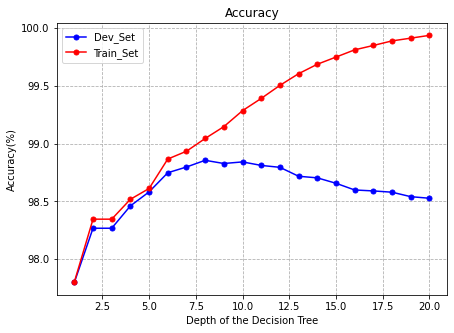

In [19]:
plt.figure(figsize=[7,5])
plt.plot([i for i in range(1,21)], np.array(ac_dev)*100, "b.",linestyle="-",  markersize=10, label="Dev_Set")
plt.plot([i for i in range(1,21)], np.array(ac_train)*100, "r.",linestyle="-",  markersize=10, label="Train_Set")
plt.title("Accuracy")
plt.xlabel("Depth of the Decision Tree")
plt.ylabel("Accuracy(%)")
#plt.xticks(ticks=[4*i for i in range(1,11)])
plt.legend()
plt.grid(linestyle='--')
plt.show()

In [144]:
model_D_T = DecisionTreeClassifier(criterion="entropy", max_depth=10).fit(X_train, y_train)
yp_train=model_D_T.predict(X_train)
yp_dev=model_D_T.predict(X_dev)
yp_test=model_D_T.predict(X_test)
print("Accuracy of Train set = ", metrics.accuracy_score(y_train,yp_train)*100)
print("Accuracy of Dev set = ", metrics.accuracy_score(y_dev,yp_dev)*100)
print("Accuracy of Test set = ", metrics.accuracy_score(y_test,yp_test)*100)

Accuracy of Train set =  99.27847966624513
Accuracy of Dev set =  98.91625072387833
Accuracy of Test set =  98.9245236191159


In [145]:
(list(y_test[y_test!=yp_test]).count("pion")/y_test.size)*100

0.6645892507514547

In [146]:
(list(y_test[y_test!=yp_test]).count("positron")/y_test.size)*100

0.41088713013264205

In [140]:
from sklearn import tree
import graphviz

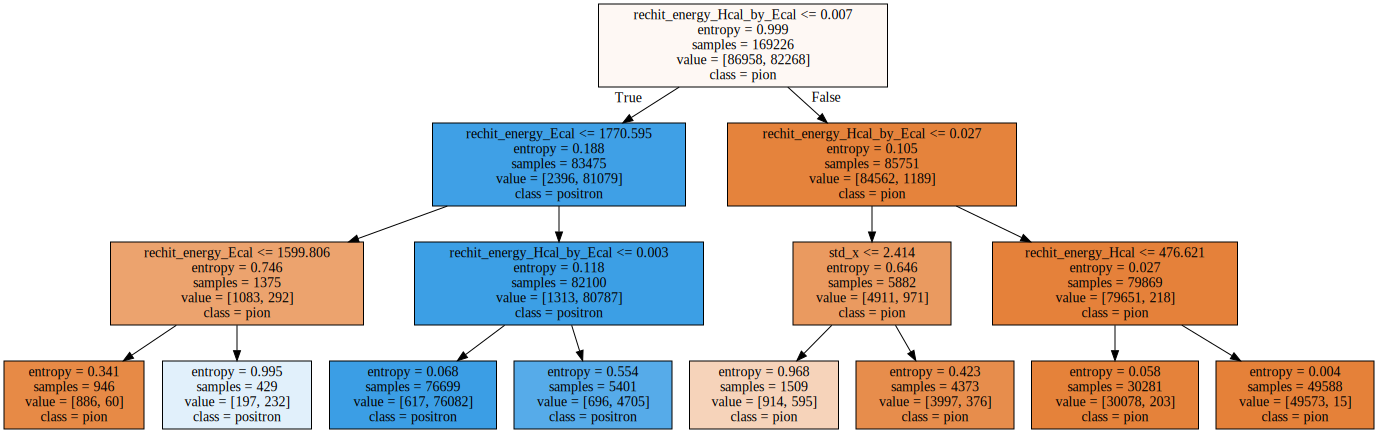

In [141]:
model_img = tree.export_graphviz(model_D_T, out_file=None, 
                                feature_names=[ "NRechits", "rechit_energy_Ecal", "rechit_energy_Hcal", "rechit_energy_Hcal_by_Ecal", "std_x", "std_y" ],  
                                class_names=["pion","positron"],
                                filled=True)

graph = graphviz.Source(model_img, format="png") 
graph

In [136]:
#graph.render("PID_DT_combined_energy")

'PID_DT_combined_energy.png'

In [14]:
pion_data.drop(list(pion_data.loc[pion_data.rechit_energy_Hcal_by_Ecal>1000000].index), inplace = True)
pion_data

,event,beamEnergy,trueBeamEnergy,NRechits,rechit_layer,rechit_x,rechit_y,rechit_z,rechit_iu,rechit_iv,...,ahc_nHits,ahc_energySum,particle,num_hits_layer,rechit_energy_layer,rechit_energy_Ecal,rechit_energy_Hcal,rechit_energy_Hcal_by_Ecal,std_x,std_y
entry,,,,,,,,,,,,,,,,,,,,,
28355,8455,50.0,49.949471,232,"[1, 2, 2, 3, 3, 4, 5, 6, 6, 7, 8, 9, 10, 10, 1...","[-0.9717636, -0.9717636, -0.9717636, 0.0, -0.9...","[2.80524, 2.80524, 1.683144, 5.61048, 2.80524,...","[13.8775, 14.7675, 14.7675, 16.7825, 16.7825, ...","[-3, -3, -2, -5, -3, -3, -3, -2, -3, -3, -3, -...","[1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, -1, 1,...",...,0,0.000000,pion,"[1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, ...","[2.381936550140381, 2.4305286407470703, 9.5968...",82.057312,641.301300,7.815285,4.658666,4.039524
37061,17161,20.0,19.867395,113,"[1, 2, 3, 4, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 1.122096, 0.0, 0.0, 0.0, ...","[13.8775, 14.7675, 16.7825, 17.6725, 17.6725, ...","[0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,2,7.089342,pion,"[1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1.1058409214019775, 1.1166751384735107, 1.151...",42.963286,276.104002,6.426510,3.149455,4.186362
95054,15451,200.0,199.064697,1035,"[1, 2, 3, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[-1.9435272, -1.9435272, -0.9717636, -1.943527...","[2.244192, 2.244192, -0.561048, 2.244192, 2.24...","[13.8775, 14.7675, 16.7825, 16.7825, 17.6725, ...","[-3, -3, 0, -3, -3, -3, -1, -4, -3, -2, -4, -2...","[2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 3, 3, -4, -3, -...",...,100,245.701767,pion,"[1, 1, 2, 1, 11, 14, 16, 19, 20, 32, 27, 33, 4...","[0.8060534000396729, 0.97751384973526, 5.12017...",12524.166114,828.249238,0.066132,3.343437,3.485708
43688,3887,100.0,99.431160,438,"[1, 2, 3, 4, 5, 6, 6, 7, 8, 9, 10, 11, 12, 13,...","[-0.9717636, -0.9717636, -0.9717636, -0.971763...","[1.683144, 1.683144, 1.683144, 1.683144, 1.683...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...","[-2, -2, -2, -2, -2, -2, -3, -2, -2, -2, -2, -...","[1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 4, ...",...,23,110.570976,pion,"[1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, ...","[1.4067063331604004, 0.9108871221542358, 1.299...",3457.063303,860.086294,0.248791,3.442350,3.685568
87695,8092,20.0,20.146393,120,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2.244192, 2.244192, 2.244192, 2.244192, 2.244...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...","[-2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,6,33.016014,pion,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1.2860832214355469, 1.9425948858261108, 0.862...",78.998617,293.039062,3.709420,4.272814,3.873026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27823,7923,300.0,298.845581,1077,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 12, 13...","[-1.9435272, -1.9435272, -1.9435272, -1.943527...","[1.122096, 1.122096, 1.122096, 1.122096, 1.122...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...","[-2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, ...",...,269,799.881287,pion,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 4, ...","[1.3581607341766357, 0.8177338242530823, 0.625...",13286.590371,1787.106152,0.134504,4.191213,4.102881
1099,1100,100.0,100.154640,575,"[1, 2, 2, 2, 3, 4, 5, 6, 7, 8, 9, 9, 10, 10, 1...","[-1.9435272, -0.9717636, -1.9435272, -5.830581...","[2.244192, 1.683144, 2.244192, 0.0, 1.683144, ...","[13.8775, 14.7675, 14.7675, 14.7675, 16.7825, ...","[-3, -2, -3, -3, -2, -2, -2, -2, -2, -2, -2, -...","[2, 1, 2, 6, 1, 1, 1, 1, 1, 1, 1, -1, 1, 2, 3,...",...,0,0.000000,pion,"[1, 3, 1, 1, 1, 1, 1, 1, 2, 3, 1, 4, 2, 8, 10,...","[0.890269935131073, 3.9279664158821106, 4.9102...",7704.643537,226.835743,0.029441,2.930243,2.806214
983

In [19]:
pred_pion_data = model_D_T.predict(pion_data[[ "NRechits", "rechit_energy_Ecal", "rechit_energy_Hcal", "rechit_energy_Hcal_by_Ecal", "std_x", "std_y" ]].values)
pion_wrong_pred = pion_data.loc[pred_pion_data=="positron"]
pion_wrong_pred

,event,beamEnergy,trueBeamEnergy,NRechits,rechit_layer,rechit_x,rechit_y,rechit_z,rechit_iu,rechit_iv,...,ahc_nHits,ahc_energySum,particle,num_hits_layer,rechit_energy_layer,rechit_energy_Ecal,rechit_energy_Hcal,rechit_energy_Hcal_by_Ecal,std_x,std_y
entry,,,,,,,,,,,,,,,,,,,,,
19432,19433,100.0,100.330643,682,"[1, 1, 2, 3, 3, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, ...","[-0.9717636, -1.9435272, -0.9717636, -0.971763...","[0.561048, -4.488384, 0.561048, -0.561048, 0.5...","[13.8775, 13.8775, 14.7675, 16.7825, 16.7825, ...","[-1, 3, -1, 0, -1, -1, -1, -4, -3, -4, -2, -5,...","[1, 2, 1, 1, 1, 1, 1, 2, 2, 3, 5, 1, 1, 1, 2, ...",...,0,0.0,pion,"[2, 1, 2, 1, 5, 12, 10, 16, 19, 24, 32, 38, 38...","[6.180340349674225, 0.96612149477005, 4.710686...",9716.435557,6.445047,0.000663,2.446097,2.594924
7012,7013,50.0,49.443764,449,"[1, 1, 2, 3, 3, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, ...","[-0.9717636, 0.9717636, -0.9717636, -0.9717636...","[1.683144, 0.561048, 1.683144, 1.683144, 0.561...","[13.8775, 13.8775, 14.7675, 16.7825, 16.7825, ...","[-2, 0, -2, -2, -1, -2, -5, -2, -3, -2, -3, -2...","[1, -1, 1, 1, 1, 1, 3, 0, 1, 1, 2, 2, 4, -3, 0...",...,0,0.0,pion,"[2, 1, 2, 2, 7, 11, 17, 27, 33, 33, 32, 29, 36...","[2.7743601202964783, 71.4569320678711, 12.0063...",5058.629679,0.762015,0.000151,2.209352,2.222476
41006,1205,20.0,19.843960,229,"[1, 2, 3, 4, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.122096, 1.122096, 1.122096, 1.122096, 1.122...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...","[-1, -1, -1, -1, -1, 2, -4, -2, -1, 1, -3, 4, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, -3, -3, -1, -1, 0,...",...,0,0.0,pion,"[1, 1, 1, 1, 1, 8, 4, 4, 13, 13, 17, 19, 17, 1...","[0.8304556012153625, 1.1631643772125244, 0.808...",1855.526184,14.903399,0.008032,1.816172,2.107856
43056,3255,20.0,20.020710,301,"[1, 1, 2, 3, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, ...","[-0.9717636, -0.9717636, -0.9717636, -0.971763...","[1.683144, 0.561048, 0.561048, 0.561048, 0.561...","[13.8775, 13.8775, 14.7675, 16.7825, 17.6725, ...","[-2, -1, -1, -1, -1, -3, -4, -2, -2, -1, -2, 0...","[1, 1, 1, 1, 1, 5, 6, 0, 1, 1, 2, 0, 0, 1, 1, ...",...,0,0.0,pion,"[2, 1, 1, 3, 4, 7, 11, 10, 10, 13, 17, 18, 17,...","[4.669512748718262, 3.1607491970062256, 0.7373...",2133.763617,3.881884,0.001819,2.400765,2.548460
75410,15708,20.0,19.947739,238,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 11, 12, 13...","[-1.9435272, -1.9435272, -0.9717636, -0.971763...","[1.122096, 1.122096, 0.561048, 0.561048, 0.561...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...","[-2, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0...","[2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 2,...",...,0,0.0,pion,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 4, 3, 8, ...","[1.1708688735961914, 1.1481600999832153, 1.660...",1853.937138,19.841019,0.010702,2.334185,2.214624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91446,11843,20.0,20.211782,241,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 11, 11, 11...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.122096, 1.122096, 1.122096, 1.122096, 1.122...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, 0, -1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 6, -2, 0, 1, 1, -6...",...,0,0.0,pion,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 6, 10, 12, 12, ...","[1.2407474517822266, 0.9684315919876099, 1.256...",2244.892832,3.143088,0.001400,2.092707,1.941594
10946,10947,20.0,20.185869,220,"[1, 1, 2, 2, 2, 3, 3, 3, 4, 5, 6, 6, 6, 6, 7, ...","[0.0, 4.858818, 0.0, -0.9717636, 3.8870544, 0....","[1.122096, 0.561048, 1.122096, -0.561048, 1.12...","[13.8775, 13.8775, 14.7675, 14.7675, 14.7675, ...","[-1, 2, -1, 0, 1, -1, -1, 0, -1, -1, 0, -1, 2,...","[0, -5, 0, 1, -4, 0, 1, -1, 0, 0, 0, 0, 2, -1,...",...,0,0.0,pion,"[2, 3, 3, 1, 1, 4, 9, 8, 19, 21, 20, 18, 22, 1...","[16.694473803043365, 8.408570528030396, 7.1087...",1841.413149,0.000000,0.000000,2.128221,1.997255
16719,16720,100.0,100.922379,655,"[1, 2, 3, 3, 4, 4, 5, 5, 5, 5,

In [20]:
1303/124376*100

1.047629767800862

In [21]:
x = [20, 50, 100, 200, 300]
y=[]
for i in x:
    y.append((pion_wrong_pred.loc[pion_wrong_pred.beamEnergy==i]).event.count()/pion_data.loc[pion_data.beamEnergy==i].event.count()*100)
y

[2.0743718592964826,
 1.2823605081202765,
 0.8843865573243287,
 0.6552763819095477,
 0.30956018332395274]

In [22]:
c=ROOT.TCanvas()

H_pion_wrong_pred = ROOT.TH1F("H_pion_wrong_pred","Pions predicted as Positrons;Energy (GeV); % of wrong prediction",35,5,355)

for i in range(5):
    H_pion_wrong_pred.SetBinContent(int(x[i]/10),y[i])
    
H_pion_wrong_pred.Draw()
c.Draw()

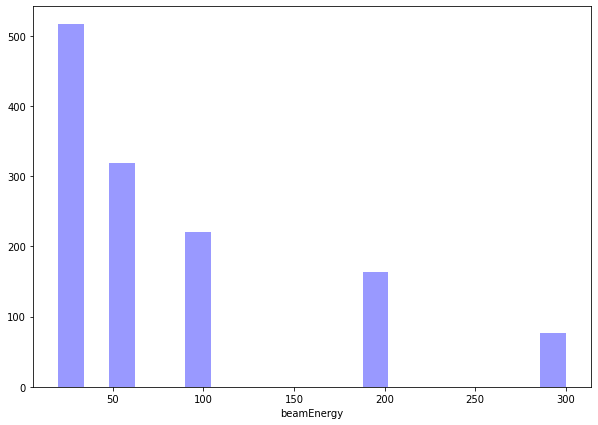

In [23]:
plt.figure(figsize=[10,7])
sns.distplot(pion_wrong_pred.beamEnergy, kde=False, color="b")

In [24]:
positron_data.drop(list(positron_data.loc[positron_data.rechit_energy_Hcal_by_Ecal>1000000].index), inplace = True)
positron_data

,event,beamEnergy,trueBeamEnergy,NRechits,rechit_layer,rechit_x,rechit_y,rechit_z,rechit_iu,rechit_iv,...,ahc_nHits,ahc_energySum,particle,num_hits_layer,rechit_energy_layer,rechit_energy_Ecal,rechit_energy_Hcal,rechit_energy_Hcal_by_Ecal,std_x,std_y
entry,,,,,,,,,,,,,,,,,,,,,
7856,7857,20.0,20.000000,259,"[1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, ...","[1.9435272, 0.9717636, 1.9435272, 1.9435272, 0...","[0.0, -0.561048, 0.0, -1.122096, -0.561048, 0....","[13.8775, 13.8775, 14.7675, 14.7675, 14.7675, ...","[1, 1, 1, 2, 1, 1, 2, 1, 2, 5, 1, 2, 0, 1, 2, ...","[-2, -1, -2, -2, -1, -2, -2, -1, 0, -3, -2, -2...",...,0,0.000000,positron,"[2, 3, 3, 6, 9, 14, 17, 16, 20, 17, 20, 14, 17...","[5.48656964302063, 29.740489721298218, 51.1123...",2106.502839,0.000000,0.000000,1.963696,1.758681
18733,8833,50.0,49.990002,409,"[1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, ...","[-0.9717636, -1.9435272, -1.9435272, 0.0, -0.9...","[2.80524, 3.366288, 2.244192, 2.244192, 2.8052...","[13.8775, 13.8775, 13.8775, 14.7675, 14.7675, ...","[-3, -4, -3, -2, -3, -2, -4, -3, -5, 2, -3, -2...","[1, 2, 2, 0, 1, 1, 2, 2, 5, -2, 1, 1, 2, 2, 2,...",...,0,0.000000,positron,"[3, 7, 10, 10, 17, 23, 23, 32, 28, 29, 33, 33,...","[15.071453332901001, 62.02698111534119, 140.12...",5084.963494,2.555515,0.000503,2.239897,2.085230
61347,1942,200.0,197.320007,971,"[1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, ...","[-0.9717636, -1.9435272, -1.9435272, -3.887054...","[1.683144, 2.244192, 1.122096, 2.244192, 0.0, ...","[13.8775, 13.8775, 13.8775, 13.8775, 14.7675, ...","[-2, -3, -2, -4, 0, 0, -2, -3, -2, -4, -3, -2,...","[1, 2, 2, 4, 0, 1, 1, 2, 2, 3, 3, 0, 0, 1, 1, ...",...,0,0.000000,positron,"[4, 7, 14, 17, 28, 29, 40, 43, 48, 46, 52, 52,...","[44.926788330078125, 86.39698994159698, 313.95...",20585.238521,14.592959,0.000709,2.477304,2.505007
30488,786,100.0,99.830002,670,"[1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, ...","[0.0, -0.9717636, -0.9717636, 3.8870544, 0.0, ...","[2.244192, 2.80524, 1.683144, 4.488384, 0.0, 3...","[13.8775, 13.8775, 13.8775, 13.8775, 14.7675, ...","[-2, -3, -2, -2, 0, -3, -2, -1, -3, -2, -2, -5...","[0, 1, 1, -4, 0, 0, 0, 0, 1, 1, 2, 3, -1, -1, ...",...,1,1.528082,positron,"[4, 10, 13, 23, 28, 36, 35, 39, 40, 39, 46, 44...","[73.69589388370514, 207.96170350909233, 443.36...",10656.300024,45.785181,0.004297,2.354201,2.724499
59428,23,200.0,197.320007,836,"[1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...","[-1.9435272, -2.9152908, -2.9152908, -2.915290...","[1.122096, 1.683144, 2.80524, 1.683144, 1.1220...","[13.8775, 13.8775, 14.7675, 14.7675, 14.7675, ...","[-2, -3, -4, -3, -3, 3, -3, -3, -5, -4, -3, -1...","[2, 3, 3, 3, 4, -3, 1, 2, 3, 3, 3, 3, 4, 4, 4,...",...,0,0.000000,positron,"[2, 4, 10, 16, 21, 23, 27, 32, 38, 52, 38, 42,...","[11.792863726615906, 49.1063517332077, 172.163...",19121.844945,27.634539,0.001445,2.621135,2.482617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64678,5273,20.0,20.000000,243,"[1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, ...","[0.0, 0.9717636, 0.0, 0.0, 1.9435272, 0.971763...","[2.244192, 1.683144, 2.244192, 1.122096, 0.0, ...","[13.8775, 13.8775, 14.7675, 14.7675, 14.7675, ...","[-2, -1, -2, -1, 1, -2, -1, -2, -1, -2, -2, 0,...","[0, -1, 0, 0, -2, -1, -1, 0, 0, 1, 3, -2, -1, ...",...,0,0.000000,positron,"[2, 5, 7, 5, 8, 16, 22, 13, 14, 21, 19, 19, 14...","[5.714633464813232, 38.73452568054199, 36.3505...",2062.123634,0.000000,0.000000,1.863298,1.962125
22574,2773,50.0,49.990002,492,"[1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, ...","[-0.9717636, -0.9717636, -3.8870544, 0.0, 0.0,...","[-0.561048, 0.561048, -2.244192, 0.0, -1.12209...","[13.8775, 13.8775, 13.8775, 14.7675, 14.7675, ...","[0, -1, 0, 0, 1, 0, -1, 4, -2, -1, 0, 1, -1, 0...","[1, 1, 4, 0, 0, 1, 1, 2, -2, -1, 0, 0, 0, 1, 1...",...,0,0.000000,positron,"[3, 7, 12, 12, 16, 18, 26, 29, 34, 32, 36, 32,...","[13.62235713005066, 52.56782001256943, 149.397...",5216.224516,6.416255,0.001230,2.258570,2.511202
4

In [25]:
pred_positron_data = model_D_T.predict(positron_data[[ "NRechits", "rechit_energy_Ecal", "rechit_energy_Hcal", "rechit_energy_Hcal_by_Ecal", "std_x", "std_y" ]].values)
positron_wrong_pred = positron_data.loc[pred_positron_data=="pion"]
positron_wrong_pred

,event,beamEnergy,trueBeamEnergy,NRechits,rechit_layer,rechit_x,rechit_y,rechit_z,rechit_iu,rechit_iv,...,ahc_nHits,ahc_energySum,particle,num_hits_layer,rechit_energy_layer,rechit_energy_Ecal,rechit_energy_Hcal,rechit_energy_Hcal_by_Ecal,std_x,std_y
entry,,,,,,,,,,,,,,,,,,,,,
91300,2192,20.0,20.000000,119,"[3, 5, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10...","[-4.858818, -5.8305817, -4.858818, -5.8305817,...","[2.80524, 2.244192, 3.9273357, 2.244192, 3.366...","[16.7825, 19.6875, 20.5775, 20.5775, 22.6925, ...","[-5, -5, -6, -5, -5, -5, -5, -5, -3, -5, -4, -...","[5, 6, 5, 6, 4, 5, 6, 4, 4, 5, 2, 5, 6, 3, 4, ...",...,0,0.000000,positron,"[0, 0, 1, 0, 1, 2, 3, 3, 3, 6, 5, 3, 4, 4, 5, ...","[0.0, 0.0, 5.3679609298706055, 0.0, 1.44278287...",426.521116,25.919236,0.060769,3.608428,2.655529
57359,7855,300.0,287.179993,1256,"[1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, ...","[-1.9435272, -1.9435272, -2.9152908, 2.9152908...","[1.122096, 0.0, -1.683144, -3.9273357, 0.0, 3....","[13.8775, 13.8775, 13.8775, 13.8775, 13.8775, ...","[-2, -1, 0, 5, 1, -3, 0, 2, -3, -1, 0, -1, 0, ...","[2, 2, 3, -3, -2, 0, 1, 1, 1, 1, 2, 2, 3, -2, ...",...,0,0.000000,positron,"[5, 9, 14, 20, 20, 36, 39, 41, 50, 57, 57, 49,...","[24.26934413611889, 129.51596415042877, 355.74...",28599.631138,139.720903,0.004885,3.031460,2.787265
66228,6823,200.0,197.320007,1008,"[1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, ...","[-1.9435272, -1.9435272, -3.8870544, 0.0, -1.9...","[2.244192, 1.122096, 1.122096, 3.366288, 2.244...","[13.8775, 13.8775, 13.8775, 14.7675, 14.7675, ...","[-3, -2, -3, -3, -3, -2, -6, -1, 6, 0, -2, -1,...","[2, 2, 4, 0, 2, 2, 3, 5, -4, 1, 1, 1, 2, 2, 2,...",...,0,0.000000,positron,"[3, 6, 9, 12, 18, 21, 35, 32, 27, 30, 36, 37, ...","[15.236660718917847, 99.53365910053253, 132.19...",18990.058719,150.535713,0.007927,2.578166,2.856214
42742,3139,300.0,287.179993,1108,"[1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, ...","[0.0, 0.0, -0.9717636, -0.9717636, -1.9435272,...","[4.488384, 3.366288, 2.80524, 1.683144, 2.2441...","[13.8775, 13.8775, 13.8775, 13.8775, 13.8775, ...","[-4, -3, -3, -2, -3, -4, -3, -4, -3, -5, -4, -...","[0, 0, 1, 1, 2, 0, 0, 1, 1, 2, 2, 4, -1, 0, 0,...",...,308,812.517456,positron,"[5, 8, 19, 21, 30, 40, 46, 43, 61, 56, 56, 64,...","[59.99411368370056, 122.74701374769211, 389.97...",21787.079056,713.555214,0.032751,4.141648,2.737258
44810,5207,100.0,99.830002,678,"[1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, ...","[-0.9717636, -0.9717636, -1.9435272, -1.943527...","[-0.561048, 0.561048, -1.122096, 1.122096, 0.0...","[13.8775, 13.8775, 13.8775, 13.8775, 14.7675, ...","[0, -1, 0, -2, 0, 0, -1, 0, 1, 3, -1, -1, -2, ...","[1, 1, 2, 2, 0, 1, 1, 2, 2, 2, 2, 3, -3, 1, 1,...",...,0,0.000000,positron,"[4, 9, 12, 20, 33, 33, 35, 44, 41, 46, 40, 47,...","[34.56604814529419, 151.55686490237713, 337.51...",9883.506444,49.598009,0.005018,2.460163,2.739957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54515,5011,20.0,20.000000,217,"[1, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, ...","[-2.9152908, -0.9717636, -2.9152908, -1.943527...","[-0.561048, -1.683144, -0.561048, -1.122096, 0...","[13.8775, 14.7675, 14.7675, 16.7825, 16.7825, ...","[-1, 1, -1, 0, -2, -1, -2, -1, 0, -1, -2, -1, ...","[3, 1, 3, 2, 3, 3, 4, 4, 2, 2, 3, 3, 4, 5, 2, ...",...,0,0.000000,positron,"[1, 2, 5, 6, 6, 9, 7, 14, 12, 17, 17, 18, 14, ...","[4.626619815826416, 28.030689239501953, 50.731...",1623.146760,34.566020,0.021296,2.301005,1.944267
45432,5829,20.0,20.000000,146,"[6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, ...","[3.8870544, 3.8870544, 6.8023453, 4.858818, 1....","[1.122096, 3.366288, 0.561048, 1.683144, 2.244...","[20.5775, 20.5775, 20.5775, 22.6925, 22.6925, ...","[1, -1, 3, 1, -1, 3, 1, 0, 2, 0, 4, 2, 4, 0, 0...","[-4, -4, -7, -5, -2, -7, -6, 0, -6, -5, -7, -6...",...,0,0.000000,positron,"[0, 0, 0, 0, 0, 3, 4, 4, 4, 2, 8, 4, 8, 4, 6, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 11.181917667388916, ...",387.206863,76.485777,0.197532,4

In [26]:
n_wrong_positron = positron_wrong_pred.beamEnergy.size
n_wrong_pion = pion_wrong_pred.beamEnergy.size

In [27]:
x = [20, 50, 100, 200, 300]
y=[]
for i in x:
    y.append((positron_wrong_pred.loc[positron_wrong_pred.beamEnergy==i]).event.count()/positron_data.loc[positron_data.beamEnergy==i].event.count()*100)
y

[1.4800436734198714,
 0.5266839484837262,
 0.21222587491157252,
 0.36289500509684,
 0.388457269700333]

In [80]:
c=ROOT.TCanvas()

H_pion_wrong_pred = ROOT.TH1F("H_pion_wrong_pred","Positrons predicted as Pion;Energy (GeV); % of wrong prediction",35,5,355)

for i in range(5):
    H_pion_wrong_pred.SetBinContent(int(x[i]/10),y[i])
    
H_pion_wrong_pred.Draw()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion_wrong_pred (Potential memory leak).


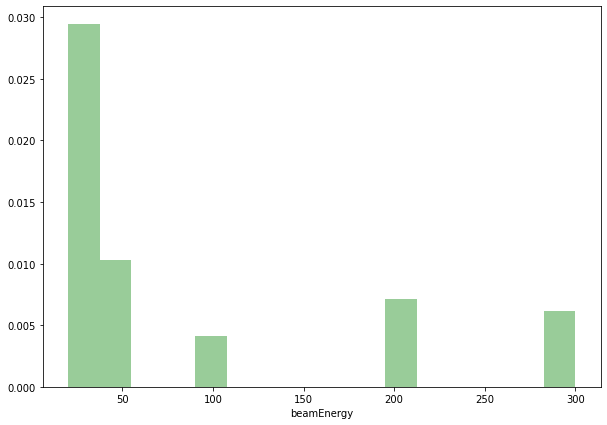

In [29]:
plt.figure(figsize=[10,7])
sns.distplot(positron_wrong_pred.beamEnergy, kde=False, color="g", norm_hist=True)

In [30]:
c1 = ROOT.TCanvas()
H_pion = ROOT.TH1F("H_pion","Energy_HCAL/Energy_ECAL for wrong prdictions; Energy_HCAL/Energy_ECAL; Normalized Entries",100, -.02, 0.2)
H_positron = ROOT.TH1F("H_positron","Energy_HCAL/Energy_ECAL; Energy_HCAL/Energy_ECAL; Normalized Entries",100, -0.02, 0.2)

positron_wrong_pred_Hcal_Ecal = positron_wrong_pred.rechit_energy_Hcal_by_Ecal.values
pion_wrong_pred_Hcal_Ecal = pion_wrong_pred.rechit_energy_Hcal_by_Ecal.values

for i in range(n_wrong_pion):
    H_pion.Fill(pion_wrong_pred_Hcal_Ecal[i])
    
for i in range(n_wrong_positron):
    H_positron.Fill(positron_wrong_pred_Hcal_Ecal[i])

H_pion.SetLineColor(4)
H_positron.SetLineColor(3)


H_pion.DrawNormalized()
H_positron.DrawNormalized("same")

legend = ROOT.TLegend();
legend.AddEntry("H_pion","Pion ","h");
legend.AddEntry("H_positron","Positron ","h");
legend.Draw();

#ROOT.gPad.SetLogx()
c1.Draw()

In [31]:
def shower_start_updated(df):
        
    l=0
    for i in range(40):
        if (i==0) and (df.rechit_energy_layer[i]>20):
            l=1
            break
        elif (i==1) and (df.rechit_energy_layer[1]>20 and df.rechit_energy_layer[1]>2*df.rechit_energy_layer[0]):
            l=2
            break
        elif (i>1) and ((df.rechit_energy_layer[i]>20) and (df.rechit_energy_layer[i]>2*df.rechit_energy_layer[i-1]) and (df.rechit_energy_layer[i]>2*df.rechit_energy_layer[i-2])):
            l=i+1
            break
    
    return l

In [32]:
positron_wrong_shower_start = positron_wrong_pred.apply(shower_start_updated, axis=1).values

In [33]:
pion_wrong_shower_start = pion_wrong_pred.apply(shower_start_updated, axis=1).values

In [34]:
c1 = ROOT.TCanvas()
H_pion = ROOT.TH1F("H_pion","Pion Shower Start Location for Wrong Prediction; Shower Start Location (layer number); Number of Entries",50, -.02, 40)

for i in range(n_wrong_pion):
    H_pion.Fill(pion_wrong_shower_start[i])
    

H_pion.SetLineColor(4)

H_pion.Draw()


c1.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).


In [35]:
c1 = ROOT.TCanvas()
H_pion = ROOT.TH1F("H_pion","Shower Start Location for Wrong Prdiction; Energy_HCAL/Shower Start Location (layer number); Normalized Entries",50, -.02, 40)
H_positron = ROOT.TH1F("H_positron","Shower Start Location for Wrong Prdiction; Energy_HCAL/Shower Start Location (layer number); Normalized Entries",50, -.02, 40)

positron_wrong_pred_Hcal_Ecal = positron_wrong_pred.rechit_energy_Hcal_by_Ecal.values
pion_wrong_pred_Hcal_Ecal = pion_wrong_pred.rechit_energy_Hcal_by_Ecal.values

for i in range(n_wrong_pion):
    H_pion.Fill(pion_wrong_shower_start[i])
    
for i in range(n_wrong_positron):
    H_positron.Fill(positron_wrong_shower_start[i])

H_pion.SetLineColor(4)
H_positron.SetLineColor(3)


H_positron.DrawNormalized()
H_pion.DrawNormalized("same")

legend = ROOT.TLegend();
legend.AddEntry("H_pion","Pion ","h");
legend.AddEntry("H_positron","Positron ","h");
legend.Draw();

#ROOT.gPad.SetLogx()
c1.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_positron (Potential memory leak).


In [36]:
l = [3,4,6,230]

xx_pion1=pion_wrong_pred.rechit_x.values[l[0]]
yy_pion1=pion_wrong_pred.rechit_y.values[l[0]]
zz_pion1=pion_wrong_pred.rechit_z.values[l[0]]

xx_pion2=pion_wrong_pred.rechit_x.values[l[1]]
yy_pion2=pion_wrong_pred.rechit_y.values[l[1]]
zz_pion2=pion_wrong_pred.rechit_z.values[l[1]]

xx_pion3=pion_wrong_pred.rechit_x.values[l[2]]
yy_pion3=pion_wrong_pred.rechit_y.values[l[2]]
zz_pion3=pion_wrong_pred.rechit_z.values[l[2]]

xx_pion4=pion_wrong_pred.rechit_x.values[l[3]]
yy_pion4=pion_wrong_pred.rechit_y.values[l[3]]
zz_pion4=pion_wrong_pred.rechit_z.values[l[3]]

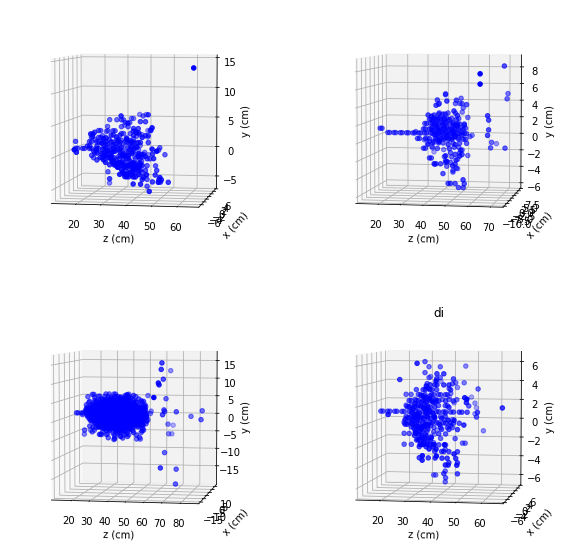

In [37]:
fig = plt.figure(figsize=(10,10))


ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.view_init(elev=5,azim=-80)
ax.scatter3D(zz_pion1, xx_pion1, yy_pion1, color = "blue",label="Positron (100GeV)")
ax.set_xlabel('z (cm)')
ax.set_ylabel('x (cm)')
ax.set_zlabel('y (cm)')



ax = fig.add_subplot(2, 2, 2, projection='3d') 
ax.view_init(elev=5,azim=-80)
ax.scatter3D(zz_pion2, xx_pion2, yy_pion2, color = "blue",label="Positron (100GeV)")
ax.set_xlabel('z (cm)')
ax.set_ylabel('x (cm)')
ax.set_zlabel('y (cm)')


ax = fig.add_subplot(2, 2, 3, projection='3d') 
ax.view_init(elev=5,azim=-80)
ax.scatter3D(zz_pion3, xx_pion3, yy_pion3, color = "blue",label="Positron (100GeV)")
ax.set_xlabel('z (cm)')
ax.set_ylabel('x (cm)')
ax.set_zlabel('y (cm)')



ax = fig.add_subplot(2, 2, 4, projection='3d')
ax.view_init(elev=5,azim=-80)
ax.scatter3D(zz_pion4, xx_pion4, yy_pion4, color = "blue",label="Positron (100GeV)")
ax.set_xlabel('z (cm)')
ax.set_ylabel('x (cm)')
ax.set_zlabel('y (cm)')

plt.title("di")

plt.show()

In [38]:
l = [3,4,6,230]

xx_positron1=positron_wrong_pred.rechit_x.values[l[0]]
yy_positron1=positron_wrong_pred.rechit_y.values[l[0]]
zz_positron1=positron_wrong_pred.rechit_z.values[l[0]]

xx_positron2=positron_wrong_pred.rechit_x.values[l[1]]
yy_positron2=positron_wrong_pred.rechit_y.values[l[1]]
zz_positron2=positron_wrong_pred.rechit_z.values[l[1]]

xx_positron3=positron_wrong_pred.rechit_x.values[l[2]]
yy_positron3=positron_wrong_pred.rechit_y.values[l[2]]
zz_positron3=positron_wrong_pred.rechit_z.values[l[2]]

xx_positron4=positron_wrong_pred.rechit_x.values[l[3]]
yy_positron4=positron_wrong_pred.rechit_y.values[l[3]]
zz_positron4=positron_wrong_pred.rechit_z.values[l[3]]

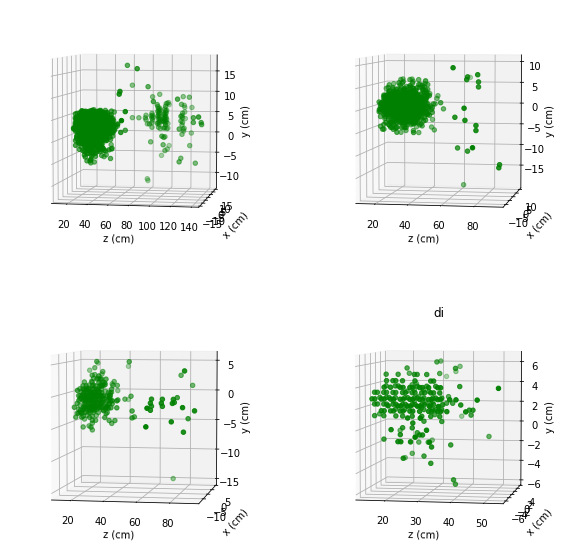

In [39]:
fig = plt.figure(figsize=(10,10))


ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.view_init(elev=5,azim=-80)
ax.scatter3D(zz_positron1, xx_positron1, yy_positron1, color = "green",label="Positron (100GeV)")
ax.set_xlabel('z (cm)')
ax.set_ylabel('x (cm)')
ax.set_zlabel('y (cm)')



ax = fig.add_subplot(2, 2, 2, projection='3d') 
ax.view_init(elev=5,azim=-80)
ax.scatter3D(zz_positron2, xx_positron2, yy_positron2, color = "green",label="Positron (100GeV)")
ax.set_xlabel('z (cm)')
ax.set_ylabel('x (cm)')
ax.set_zlabel('y (cm)')


ax = fig.add_subplot(2, 2, 3, projection='3d') 
ax.view_init(elev=5,azim=-80)
ax.scatter3D(zz_positron3, xx_positron3, yy_positron3, color = "green",label="Positron (100GeV)")
ax.set_xlabel('z (cm)')
ax.set_ylabel('x (cm)')
ax.set_zlabel('y (cm)')



ax = fig.add_subplot(2, 2, 4, projection='3d')
ax.view_init(elev=5,azim=-80)
ax.scatter3D(zz_positron4, xx_positron4, yy_positron4, color = "green",label="Positron (100GeV)")
ax.set_xlabel('z (cm)')
ax.set_ylabel('x (cm)')
ax.set_zlabel('y (cm)')

plt.title("di")

plt.show()

In [40]:
filename = 'DT_combined_energies.sav'
#pickle.dump(model_D_T, open(filename, 'wb'))

In [41]:
model_D_T = pickle.load(open(filename, 'rb'))

In [42]:
yp_train=model_D_T.predict(X_train)
yp_dev=model_D_T.predict(X_dev)
yp_test=model_D_T.predict(X_test)
print("Accuracy of Train set = ", metrics.accuracy_score(y_train,yp_train)*100)
print("Accuracy of Dev set = ", metrics.accuracy_score(y_dev,yp_dev)*100)
print("Accuracy of Test set = ", metrics.accuracy_score(y_test,yp_test)*100)

Accuracy of Train set =  99.16384007185657
Accuracy of Dev set =  99.20855968893913
Accuracy of Test set =  99.16443758100544


In [43]:
98.919-99.27966

-0.36066000000001

In [112]:
pion_wrong_pred_20 = pion_wrong_pred.loc[pion_wrong_pred.beamEnergy==20]
pion_wrong_pred_300 = pion_wrong_pred.loc[pion_wrong_pred.beamEnergy==300]
pion_wrong_pred_20["shower_start_layer"] =  pion_wrong_pred_20.apply(shower_start_updated, axis=1)
pion_wrong_pred_300["shower_start_layer"] =  pion_wrong_pred_300.apply(shower_start_updated, axis=1)
pion_wrong_pred_20

<ipython-input-112-cc0bd27304dc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pion_wrong_pred_20["shower_start_layer"] =  pion_wrong_pred_20.apply(shower_start_updated, axis=1)
<ipython-input-112-cc0bd27304dc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pion_wrong_pred_300["shower_start_layer"] =  pion_wrong_pred_300.apply(shower_start_updated, axis=1)


,event,beamEnergy,trueBeamEnergy,NRechits,rechit_layer,rechit_x,rechit_y,rechit_z,rechit_iu,rechit_iv,...,ahc_energySum,particle,num_hits_layer,rechit_energy_layer,rechit_energy_Ecal,rechit_energy_Hcal,rechit_energy_Hcal_by_Ecal,std_x,std_y,shower_start_layer
entry,,,,,,,,,,,,,,,,,,,,,
41006,1205,20.0,19.843960,229,"[1, 2, 3, 4, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.122096, 1.122096, 1.122096, 1.122096, 1.122...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...","[-1, -1, -1, -1, -1, 2, -4, -2, -1, 1, -3, 4, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, -3, -3, -1, -1, 0,...",...,0.0,pion,"[1, 1, 1, 1, 1, 8, 4, 4, 13, 13, 17, 19, 17, 1...","[0.8304556012153625, 1.1631643772125244, 0.808...",1855.526184,14.903399,0.008032,1.816172,2.107856,6
43056,3255,20.0,20.020710,301,"[1, 1, 2, 3, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, ...","[-0.9717636, -0.9717636, -0.9717636, -0.971763...","[1.683144, 0.561048, 0.561048, 0.561048, 0.561...","[13.8775, 13.8775, 14.7675, 16.7825, 17.6725, ...","[-2, -1, -1, -1, -1, -3, -4, -2, -2, -1, -2, 0...","[1, 1, 1, 1, 1, 5, 6, 0, 1, 1, 2, 0, 0, 1, 1, ...",...,0.0,pion,"[2, 1, 1, 3, 4, 7, 11, 10, 10, 13, 17, 18, 17,...","[4.669512748718262, 3.1607491970062256, 0.7373...",2133.763617,3.881884,0.001819,2.400765,2.548460,5
75410,15708,20.0,19.947739,238,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 11, 12, 13...","[-1.9435272, -1.9435272, -0.9717636, -0.971763...","[1.122096, 1.122096, 0.561048, 0.561048, 0.561...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...","[-2, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0...","[2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 2,...",...,0.0,pion,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 4, 3, 8, ...","[1.1708688735961914, 1.1481600999832153, 1.660...",1853.937138,19.841019,0.010702,2.334185,2.214624,10
50655,10854,20.0,19.886372,268,"[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 7, ...","[0.0, -0.9717636, 0.0, -0.9717636, 0.0, -0.971...","[1.122096, 0.561048, 1.122096, 0.561048, 1.122...","[13.8775, 13.8775, 14.7675, 14.7675, 16.7825, ...","[-1, -1, -1, -1, -1, -1, 0, -1, 0, -1, 0, -1, ...","[0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",...,0.0,pion,"[2, 2, 2, 2, 2, 2, 3, 3, 7, 9, 11, 14, 16, 16,...","[4.549523830413818, 2.8901665806770325, 3.2315...",1812.460432,36.609661,0.020199,2.178836,2.955900,8
93654,14051,20.0,19.897657,237,"[1, 1, 1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, ...","[0.0, -4.858818, 0.9717636, 0.0, 0.9717636, 0....","[0.0, 0.561048, 2.80524, 0.0, -0.561048, 0.0, ...","[13.8775, 13.8775, 13.8775, 14.7675, 14.7675, ...","[0, -3, -2, 0, 1, 0, 3, 0, 0, 1, 4, 3, 0, 2, 0...","[0, 5, -1, 0, -1, 0, -3, -1, 0, 0, -3, -2, 0, ...",...,0.0,pion,"[3, 2, 3, 4, 6, 6, 8, 13, 19, 16, 22, 14, 18, ...","[95.46407550573349, 2.9258338809013367, 19.975...",1819.835359,0.000000,0.000000,1.934579,1.942154,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92817,13214,20.0,20.001696,247,"[1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 4, 5, 6, 6, ...","[0.0, 0.0, -3.8870544, -4.858818, 0.0, -3.8870...","[1.122096, 1.122096, 4.488384, 2.80524, 1.1220...","[13.8775, 14.7675, 14.7675, 14.7675, 16.7825, ...","[-1, -1, -6, -5, -1, -4, 1, -1, -2, -3, -2, -2...","[0, 0, 4, 5, 0, 4, -1, 0, 1, 2, 3, 4, 0, 0, 0,...",...,0.0,pion,"[1, 3, 3, 5, 1, 4, 6, 9, 14, 18, 16, 15, 17, 1...","[3.598773956298828, 3.197787284851074, 13.6064...",1773.869326,61.319367,0.034568,1.987198,2.122251,4
3531,3532,20.0,18.813116,319,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, ...","[0.0, -0.9717636, -0.9717636, -1.9435272, -1.9...","[1.122096, 2.80524, 1.683144, 1.122096, 0.0, 2...","[13.8775, 13.8775, 13.8775, 13.8775, 13.8775, ...","[-1, -3, -2, -2, -1, -4, -3, -1, 2, -1, 0, -1,...","[0, 1, 1, 2, 2, 3, 3, 3, -4, -4, -1, 0, 1, 1, ...",...,0.0,pion,"[11, 15, 21, 16, 23, 23, 21, 16, 19, 19, 18, 1...","[26.903545424342155, 102.89511847496033, 106.1...",2136.265303,0.000000,0.000000,2.263672,2.030408,1
69317,9615,20.0,19.930122,227,"[1, 1, 1, 2, 2, 2, 2, 2

In [116]:
pion_20_wrong_shower_start = pion_wrong_pred_20.apply(shower_start_updated, axis=1).values
pion_300_wrong_shower_start = pion_wrong_pred_300.apply(shower_start_updated, axis=1).values

c1 = ROOT.TCanvas()
H_pion_20 = ROOT.TH1F("H_pion_20","Pion Shower Start Location for Wrong Prediction; Shower Start Location (layer number); Normalized Entries",50, -.02, 40)
H_pion_300 = ROOT.TH1F("H_pion_300","Pion Shower Start Location for Wrong Prediction; Shower Start Location (layer number); Normalized Entries",50, -.02, 40)



for i in range(pion_wrong_pred_20.event.count()):
    H_pion_20.Fill(pion_20_wrong_shower_start[i])
    
for i in range(pion_wrong_pred_300.event.count()):
    H_pion_300.Fill(pion_300_wrong_shower_start[i])
    

H_pion_20.SetLineColor(2)
H_pion_300.SetLineColor(4)


H_pion_300.DrawNormalized()
H_pion_20.DrawNormalized("same")


legend = ROOT.TLegend();
legend.AddEntry("H_pion_20","Pion (20 GeV)","h");
legend.AddEntry("H_pion_300","Pion (300 GeV)","h");

legend.Draw();

c1.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion_20 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion_300 (Potential memory leak).


In [46]:
l = [3,456,100,230]

xx_pion1=pion_wrong_pred_20.rechit_x.values[l[0]]
yy_pion1=pion_wrong_pred_20.rechit_y.values[l[0]]
zz_pion1=pion_wrong_pred_20.rechit_z.values[l[0]]

xx_pion2=pion_wrong_pred_20.rechit_x.values[l[1]]
yy_pion2=pion_wrong_pred_20.rechit_y.values[l[1]]
zz_pion2=pion_wrong_pred_20.rechit_z.values[l[1]]

xx_pion3=pion_wrong_pred_20.rechit_x.values[l[2]]
yy_pion3=pion_wrong_pred_20.rechit_y.values[l[2]]
zz_pion3=pion_wrong_pred_20.rechit_z.values[l[2]]

xx_pion4=pion_wrong_pred_20.rechit_x.values[l[3]]
yy_pion4=pion_wrong_pred_20.rechit_y.values[l[3]]
zz_pion4=pion_wrong_pred_20.rechit_z.values[l[3]]

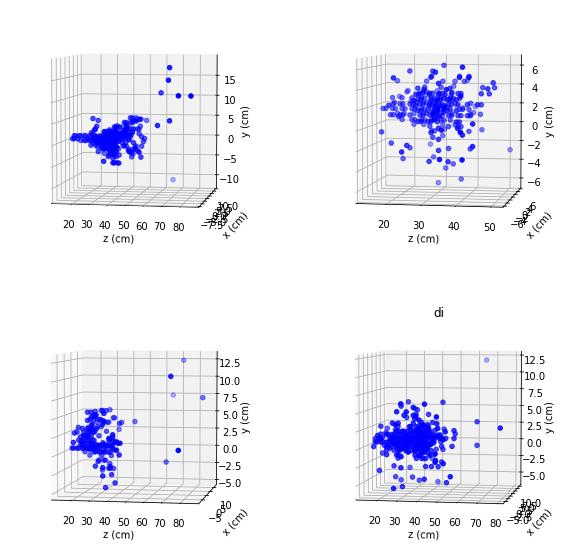

In [47]:
fig = plt.figure(figsize=(10,10))


ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.view_init(elev=5,azim=-80)
ax.scatter3D(zz_pion1, xx_pion1, yy_pion1, color = "blue",label="Positron (100GeV)")
ax.set_xlabel('z (cm)')
ax.set_ylabel('x (cm)')
ax.set_zlabel('y (cm)')



ax = fig.add_subplot(2, 2, 2, projection='3d') 
ax.view_init(elev=5,azim=-80)
ax.scatter3D(zz_pion2, xx_pion2, yy_pion2, color = "blue",label="Positron (100GeV)")
ax.set_xlabel('z (cm)')
ax.set_ylabel('x (cm)')
ax.set_zlabel('y (cm)')


ax = fig.add_subplot(2, 2, 3, projection='3d') 
ax.view_init(elev=5,azim=-80)
ax.scatter3D(zz_pion3, xx_pion3, yy_pion3, color = "blue",label="Positron (100GeV)")
ax.set_xlabel('z (cm)')
ax.set_ylabel('x (cm)')
ax.set_zlabel('y (cm)')



ax = fig.add_subplot(2, 2, 4, projection='3d')
ax.view_init(elev=5,azim=-80)
ax.scatter3D(zz_pion4, xx_pion4, yy_pion4, color = "blue",label="Positron (100GeV)")
ax.set_xlabel('z (cm)')
ax.set_ylabel('x (cm)')
ax.set_zlabel('y (cm)')

plt.title("di")

plt.show()

In [48]:
l = [3,456,100,230]

pion_a=pion_wrong_pred_20.rechit_energy_layer.values[l[0]]

pion_b=pion_wrong_pred_20.rechit_energy_layer.values[l[1]]

pion_c=pion_wrong_pred_20.rechit_energy_layer.values[l[2]]

pion_d=pion_wrong_pred_20.rechit_energy_layer.values[l[3]]


In [49]:
c1= ROOT.TCanvas("c1","20 GeV Incident Pion in the Detector");
c1.Divide(2,2);

c1.cd(1);
h1 = ROOT.TH1F("h1",";Layer Number;Energy Deposited(MIPS)",40,-0.5,40.5)
for i in range(40):
    h1.SetBinContent(i+1,pion_a[i] )
h1.Draw()

c1.cd(2);
h2 = ROOT.TH1F("h2",";Layer Number;Energy Deposited(MIPS)",40,-0.5,40.5)
for i in range(40):
    h2.SetBinContent(i+1,pion_b[i] )
h2.Draw()

c1.cd(3);
h3 = ROOT.TH1F("h3",";Layer Number;Energy Deposited(MIPS)",40,-0.5,40.5)
for i in range(40):
    h3.SetBinContent(i+1,pion_c[i] )
h3.Draw()

c1.cd(4);
h4 = ROOT.TH1F("h4",";Layer Number;Energy Deposited(MIPS)",40,-0.5,40.5)
for i in range(40):
    h4.SetBinContent(i+1,pion_d[i] )
h4.Draw()


c1.SetTitle("100 GeV Incident Positrons in the Detector")
c1.Draw()

In [50]:
l = [3,1,4,2]

pion_wrong_pred_20_shower_gr_15 = pion_wrong_pred_20.loc[pion_wrong_pred_20.shower_start_layer>16]

pion_a=pion_wrong_pred_20_shower_gr_15.rechit_energy_layer.values[l[0]]

pion_b=pion_wrong_pred_20_shower_gr_15.rechit_energy_layer.values[l[1]]

pion_c=pion_wrong_pred_20_shower_gr_15.rechit_energy_layer.values[l[2]]

pion_d=pion_wrong_pred_20_shower_gr_15.rechit_energy_layer.values[l[3]]


c1= ROOT.TCanvas("c1","20 GeV Incident Pion in the Detector");
c1.Divide(2,2);

c1.cd(1);
h1 = ROOT.TH1F("h1",";Layer Number;Energy Deposited(MIPS)",40,-0.5,40.5)
for i in range(40):
    h1.SetBinContent(i+1,pion_a[i] )
h1.Draw()

c1.cd(2);
h2 = ROOT.TH1F("h2",";Layer Number;Energy Deposited(MIPS)",40,-0.5,40.5)
for i in range(40):
    h2.SetBinContent(i+1,pion_b[i] )
h2.Draw()

c1.cd(3);
h3 = ROOT.TH1F("h3",";Layer Number;Energy Deposited(MIPS)",40,-0.5,40.5)
for i in range(40):
    h3.SetBinContent(i+1,pion_c[i] )
h3.Draw()

c1.cd(4);
h4 = ROOT.TH1F("h4",";Layer Number;Energy Deposited(MIPS)",40,-0.5,40.5)
for i in range(40):
    h4.SetBinContent(i+1,pion_d[i] )
h4.Draw()


c1.SetTitle("100 GeV Incident Positrons in the Detector")
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h3 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h4 (Potential memory leak).


In [52]:
#pion_data["shower_start_location"] = pion_data.apply(shower_start_updated, axis=1)
pion_data_300gev_shower_layer_16 = pion_data.loc[(pion_data.shower_start_location==16) & (pion_data.beamEnergy==300)]
pion_data_300gev_shower_layer_16

,event,beamEnergy,trueBeamEnergy,NRechits,rechit_layer,rechit_x,rechit_y,rechit_z,rechit_iu,rechit_iv,...,ahc_energySum,particle,num_hits_layer,rechit_energy_layer,rechit_energy_Ecal,rechit_energy_Hcal,rechit_energy_Hcal_by_Ecal,std_x,std_y,shower_start_location
entry,,,,,,,,,,,,,,,,,,,,,
84742,5139,300.0,298.418182,972,"[1, 2, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 8, ...","[-2.9152908, -2.9152908, -1.9435272, -2.915290...","[1.683144, 1.683144, 2.244192, 1.683144, 3.927...","[13.8775, 14.7675, 16.7825, 16.7825, 17.6725, ...","[-3, -3, -3, -3, -5, -3, -2, -2, -3, -2, -3, -...","[3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 4, 3, 2, ...",...,1908.926147,pion,"[1, 1, 2, 3, 3, 3, 1, 2, 4, 2, 1, 2, 1, 4, 2, ...","[1.4218486547470093, 2.9188461303710938, 12.60...",7643.557487,1938.628252,0.253629,4.560118,4.207542,16
7389,7390,300.0,298.476654,973,"[1, 2, 3, 4, 5, 6, 7, 8, 8, 9, 9, 10, 10, 11, ...","[-1.9435272, -1.9435272, -1.9435272, -1.943527...","[1.122096, 1.122096, 1.122096, 1.122096, 1.122...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...","[-2, -2, -2, -2, -2, -2, -2, -2, -2, -2, 2, 4,...","[2, 2, 2, 2, 2, 2, 2, 1, 2, 1, -5, 1, 1, 1, 0,...",...,2731.696533,pion,"[1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 1, 4, 3, ...","[0.9985888600349426, 1.6423730850219727, 0.788...",9925.628184,2277.567530,0.229463,3.545206,3.921329,16
18088,18089,300.0,296.881958,235,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[-1.9435272, -1.9435272, -1.9435272, -1.943527...","[1.122096, 1.122096, 1.122096, 1.122096, 1.122...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...","[-2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",...,7431.262207,pion,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1.0278940200805664, 1.1463067531585693, 0.872...",210.931169,1376.373141,6.525224,2.913058,2.660703,16
87464,7861,300.0,301.583313,1142,"[1, 2, 3, 3, 4, 5, 6, 7, 7, 8, 9, 10, 11, 12, ...","[-0.9717636, -0.9717636, -0.9717636, -1.943527...","[0.561048, 0.561048, 0.561048, 0.0, 0.561048, ...","[13.8775, 14.7675, 16.7825, 16.7825, 17.6725, ...","[-1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1...","[1, 1, 1, 2, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1...",...,59.437004,pion,"[1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 3, ...","[1.7889834642410278, 1.8718647956848145, 6.443...",8937.601431,2239.438416,0.250564,4.747590,4.661357,16
53999,14198,300.0,299.236267,1006,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 13...","[-1.9435272, -1.9435272, -1.9435272, -1.943527...","[1.122096, 1.122096, 1.122096, 1.122096, 1.122...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...","[-2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, ...",...,1787.800537,pion,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 5, ...","[1.450170636177063, 1.039630651473999, 1.93841...",2446.244290,3242.023737,1.325307,4.667486,4.427357,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33111,13211,300.0,303.121521,1030,"[1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 5, 5, 5, ...","[-0.9717636, -1.9435272, 0.0, 0.0, -0.9717636,...","[-0.561048, 0.0, -1.122096, -2.244192, -0.5610...","[13.8775, 13.8775, 14.7675, 14.7675, 14.7675, ...","[0, -1, 1, 2, 0, -1, 0, 0, -1, 2, 0, -1, 1, 0,...","[1, 2, 0, 0, 1, -2, 1, 2, 2, -2, 1, 2, 0, 1, 1...",...,1547.918579,pion,"[2, 4, 4, 2, 6, 5, 4, 2, 3, 4, 4, 2, 2, 3, 4, ...","[2.7131271958351135, 11.489773511886597, 14.03...",2263.337536,4000.780281,1.767646,4.372862,4.651979,16
1570,1571,300.0,298.088898,1121,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 13...","[-1.9435272, -1.9435272, -1.9435272, -1.943527...","[1.122096, 1.122096, 1.122096, 1.122096, 1.122...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...","[-2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, -1, 2,...",...,947.329590,pion,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, ...","[1.3390668630599976, 0.9886475801467896, 1.005...",9396.216418,26

In [53]:
l = [36,132,454,2]



pion_a=pion_data_300gev_shower_layer_16.rechit_energy_layer.values[l[0]]

pion_b=pion_data_300gev_shower_layer_16.rechit_energy_layer.values[l[1]]

pion_c=pion_data_300gev_shower_layer_16.rechit_energy_layer.values[l[2]]

pion_d=pion_data_300gev_shower_layer_16.rechit_energy_layer.values[l[3]]


c1= ROOT.TCanvas("c1","20 GeV Incident Pion in the Detector");
c1.Divide(2,2);

c1.cd(1);
h1 = ROOT.TH1F("h1",";Layer Number;Energy Deposited(MIPS)",40,-0.5,40.5)
for i in range(40):
    h1.SetBinContent(i+1,pion_a[i] )
h1.Draw()

c1.cd(2);
h2 = ROOT.TH1F("h2",";Layer Number;Energy Deposited(MIPS)",40,-0.5,40.5)
for i in range(40):
    h2.SetBinContent(i+1,pion_b[i] )
h2.Draw()

c1.cd(3);
h3 = ROOT.TH1F("h3",";Layer Number;Energy Deposited(MIPS)",40,-0.5,40.5)
for i in range(40):
    h3.SetBinContent(i+1,pion_c[i] )
h3.Draw()

c1.cd(4);
h4 = ROOT.TH1F("h4",";Layer Number;Energy Deposited(MIPS)",40,-0.5,40.5)
for i in range(40):
    h4.SetBinContent(i+1,pion_d[i] )
h4.Draw()


c1.SetTitle("100 GeV Incident Positrons in the Detector")
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h3 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h4 (Potential memory leak).


In [110]:
n=16

pion_data_20gev_shower_layer_16 = pion_data.loc[(pion_data.shower_start_location==n) & (pion_data.beamEnergy==20)]
pion_data_50gev_shower_layer_16 = pion_data.loc[(pion_data.shower_start_location==n) & (pion_data.beamEnergy==50)]
pion_data_100gev_shower_layer_16 = pion_data.loc[(pion_data.shower_start_location==n) & (pion_data.beamEnergy==100)]
pion_data_200gev_shower_layer_16 = pion_data.loc[(pion_data.shower_start_location==n) & (pion_data.beamEnergy==200)]
pion_data_300gev_shower_layer_16 = pion_data.loc[(pion_data.shower_start_location==n) & (pion_data.beamEnergy==300)]

In [111]:
c1 = ROOT.TCanvas()
H_pion_20 = ROOT.TH1F("H_pion_20","Energy_HCAL/Energy_ECAL for shower starting in 16 layer; Energy_HCAL/Energy_ECAL; Normalized Entries",50, -.02, 1)
#H_pion_50 = ROOT.TH1F("H_pion_50","Energy_HCAL/Energy_ECAL; Energy_HCAL/Energy_ECAL; Normalized Entries",100, -.02, 1)
H_pion_100 = ROOT.TH1F("H_pion_100","Energy_HCAL/Energy_ECAL; Energy_HCAL/Energy_ECAL; Normalized Entries",50, -.02, .5)
#H_pion_200 = ROOT.TH1F("H_pion_200","Energy_HCAL/Energy_ECAL; Energy_HCAL/Energy_ECAL; Normalized Entries",100, -.02, .009)
H_pion_300 = ROOT.TH1F("H_pion_300","Energy_HCAL/Energy_ECAL; Energy_HCAL/Energy_ECAL; Normalized Entries",50, -.02, 1)

pion_wrong_pred_Hcal_Ecal_20 = pion_data_20gev_shower_layer_16.rechit_energy_Hcal_by_Ecal.values
#pion_wrong_pred_Hcal_Ecal_50 = pion_data_50gev_shower_layer_16.rechit_energy_Hcal_by_Ecal.values
#pion_wrong_pred_Hcal_Ecal_100 = pion_data_100gev_shower_layer_16.rechit_energy_Hcal_by_Ecal.values
#pion_wrong_pred_Hcal_Ecal_200 = pion_data_200gev_shower_layer_16.rechit_energy_Hcal_by_Ecal.values
pion_wrong_pred_Hcal_Ecal_300 = pion_data_300gev_shower_layer_16.rechit_energy_Hcal_by_Ecal.values

for i in range(pion_wrong_pred_Hcal_Ecal_20.size):
    H_pion_20.Fill(pion_wrong_pred_Hcal_Ecal_20[i])
    
#for i in range(pion_wrong_pred_Hcal_Ecal_50.size):
#    H_pion_50.Fill(pion_wrong_pred_Hcal_Ecal_50[i])
    
#for i in range(pion_wrong_pred_Hcal_Ecal_100.size):
#    H_pion_100.Fill(pion_wrong_pred_Hcal_Ecal_100[i])
    
#for i in range(pion_wrong_pred_Hcal_Ecal_200.size):
#    H_pion_200.Fill(pion_wrong_pred_Hcal_Ecal_200[i])
    
for i in range(pion_wrong_pred_Hcal_Ecal_300.size):
    H_pion_300.Fill(pion_wrong_pred_Hcal_Ecal_300[i])

H_pion_20.SetLineColor(2)
#H_pion_50.SetLineColor(2)
#H_pion_100.SetLineColor(3)
#H_pion_200.SetLineColor(4)
H_pion_300.SetLineColor(4)


#H_pion_20.SetFillColor(2)
#H_pion_100.SetFillColor(3)
#H_pion_300.SetFillColor(5)


H_pion_20.DrawNormalized()
#H_pion_50.DrawNormalized("same")
#H_pion_100.DrawNormalized("same")
#H_pion_200.DrawNormalized("same")
H_pion_300.DrawNormalized("same")


legend = ROOT.TLegend();
legend.AddEntry("H_pion_20","Pion (20 GeV)","h");
#legend.AddEntry("H_pion_50","Pion (50 GeV)","h");
#legend.AddEntry("H_pion_100","Pion (100 GeV)","h");
#legend.AddEntry("H_pion_200","Pion (200 GeV)","h");
legend.AddEntry("H_pion_300","Pion (300 GeV)","h");

legend.Draw();

#ROOT.gPad.SetLogx()
c1.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion_20 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion_100 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion_300 (Potential memory leak).


In [107]:
c1 = ROOT.TCanvas()
H_pion = ROOT.TH2D("h2","Pion (20Gev); Ecal_Energy (MIPS); Hcal_Energy (MIPS)",100, 0.0, 6000,100, 0, 1500)

pion_total_E_deposit_Ecal_20 = pion_data_20gev_shower_layer_16.rechit_energy_Ecal.values
pion_total_E_deposit_Hcal_20 = pion_data_20gev_shower_layer_16.rechit_energy_Hcal.values

for i in range(470):
    H_pion.Fill(pion_total_E_deposit_Ecal_20[i], pion_total_E_deposit_Hcal_20[i])
    
H_pion.Draw("COLZ")
c1.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).


In [109]:
c1 = ROOT.TCanvas()
H_pion = ROOT.TH2D("h2","Pion (300Gev); Ecal_Energy (MIPS); Hcal_Energy (MIPS)",100, 0.0, 12000,100, 0, 9500)

pion_total_E_deposit_Ecal_20 = pion_data_300gev_shower_layer_16.rechit_energy_Ecal.values
pion_total_E_deposit_Hcal_20 = pion_data_300gev_shower_layer_16.rechit_energy_Hcal.values

for i in range(431):
    H_pion.Fill(pion_total_E_deposit_Ecal_20[i], pion_total_E_deposit_Hcal_20[i])
    
H_pion.Draw("COLZ")
c1.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).
